In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FixedLocator

def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((vpp is not None) | 
        (vpn is not None) | 
        (sensibilidad is not None) |
        (especificidad is not None) | 
        (prevalencia is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])



    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color=color) 


    if show_metrics==True:


        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 

        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"        
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)          



    


Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


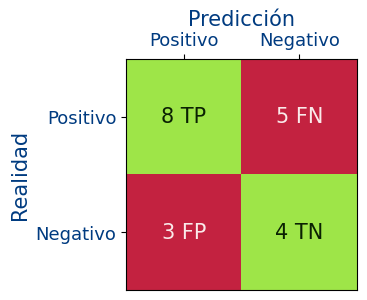

In [2]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,TN=4,FP=3,FN=5)




In [3]:
#Ejercicio 2.A
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

print(y_pred)

[False False  True  True False False False False  True  True  True False
 False]


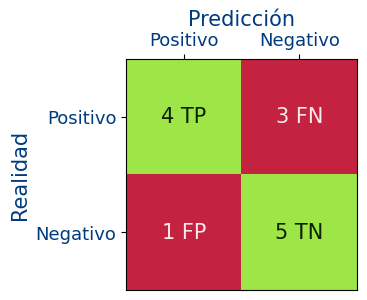

In [4]:
#Ejercicio 2.B
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5


TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


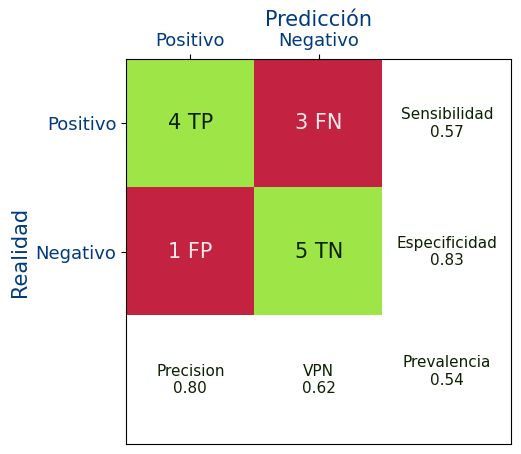

In [40]:
#Ejercicio 2.C


y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

sensibilidad=TP/(TP+FN)
especificidad=TN/(TN+FP)
prevalencia=(TP+FN)/(TP+FN+FP+TN)
vpp=TP/(TP+FP)
vpn=TN/(FN+TN)

figure=plt.figure(figsize=(5, 5)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        sensibilidad=sensibilidad,
        especificidad=especificidad,
        prevalencia=prevalencia,vpn=vpn,vpp=vpp)

In [41]:
# Ejercicio 2.D
vpp_bayes=(sensibilidad*prevalencia)/(sensibilidad*prevalencia+(1-especificidad)*(1-prevalencia))
vpn_bayes=(especificidad*(1-prevalencia))/(especificidad*(1-prevalencia)+(1-sensibilidad)*prevalencia)

print(f"VPP Bayes={vpp_bayes:.2f}")
print(f"VPN Bayes={vpn_bayes:.2f}")

VPP Bayes=0.80
VPN Bayes=0.62


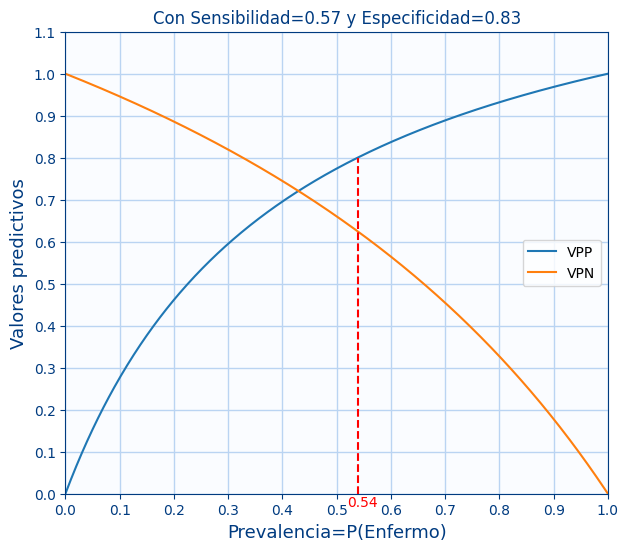

In [42]:
# Ejercicio 2.E
def axes_configure_for_metrics(axes,title,xlabel,ylabel,color="#003B80",facecolor="#FAFCFF",gridcolor="#BAD4F2"):
    axes.set_xlabel(xlabel, fontsize=13,color=color)
    axes.set_ylabel(ylabel, fontsize=13,color=color)
    axes.set_title(title,color=color)


    axes.set_xlim(xmin=0,xmax=1)
    axes.set_ylim(ymin=0,ymax=1.1)

    axes.xaxis.set_major_locator(MultipleLocator(0.1))
    axes.yaxis.set_major_locator(MultipleLocator(0.1))
    axes.grid(visible=True, which='major', axis='both',color=gridcolor,linewidth=1)

    axes.set_facecolor(facecolor)
    axes.spines['bottom'].set_color(color)
    axes.spines['top'].set_color(color)
    axes.spines['right'].set_color(color)
    axes.spines['left'].set_color(color)
    axes.xaxis.label.set_color(color)
    axes.tick_params(axis='both', colors=color)

    axes.legend()



rango_prevalencia=np.linspace(0,1,500)

rango_vpp=(sensibilidad*rango_prevalencia)/(sensibilidad*rango_prevalencia+(1-especificidad)*(1-rango_prevalencia))
rango_vpn=(especificidad*(1-rango_prevalencia))/(especificidad*(1-rango_prevalencia)+(1-sensibilidad)*rango_prevalencia)



figure=plt.figure(figsize=(7, 6)) 
axes=figure.add_subplot(1,1,1)
 
axes.plot(rango_prevalencia,rango_vpp,linestyle="solid",label="VPP")
axes.plot(rango_prevalencia,rango_vpn,linestyle="solid",label="VPN")

#La prevalencia original
axes.vlines(x = prevalencia, ymin = 0, ymax = max(vpp,vpn),colors = '#ff0000',linestyle="dashed")
axes.text(prevalencia-0.02,-0.03,f'{prevalencia:0.2f}',c="#ff0000")

axes_configure_for_metrics(axes,f"Con Sensibilidad={sensibilidad:.2f} y Especificidad={especificidad:.2f}",'Prevalencia=P(Enfermo)',"Valores predictivos")



In [8]:
#Rutinas comunes

import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import tensorflow_addons as tfa
import sklearn


def plot_metrics(axes,history,title,metric,label):

 
      axes.plot(history[metric],linestyle="dotted",c="#003B80")  
      axes.plot(history[f'val_{metric}'],linestyle="solid",label=f"{label} validación:{history[f'val_{metric}'][-1]:.2f}",c="#003B80")

      axes.set_xlabel('Nº Épocas', fontsize=13,color="#003B80")
      axes.xaxis.set_major_locator(MaxNLocator(integer=True))

      axes.set_ylabel(label, fontsize=13,color="#003B80")
      axes.set_ylim(ymin=0,ymax=1.1)
      axes.yaxis.set_major_locator(MultipleLocator(0.1))

      axes.set_title(title)
      axes.set_facecolor("#F0F7FF")
      axes.grid(visible=True, which='major', axis='both',color="#FFFFFF",linewidth=2)
      axes.legend()

def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test,metrics=[]):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

    return history,model

def get_datos():
  datos=load_breast_cancer()
  x=datos.data
  y=datos.target

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

  return x_train, x_test, y_train, y_test    

/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


2024-03-08 21:39:47.183956: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-03-08 21:39:47.183982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: beren
2024-03-08 21:39:47.183988: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: beren
2024-03-08 21:39:47.184093: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.161.7
2024-03-08 21:39:47.184108: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 535.161.7
2024-03-08 21:39:47.184112: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 535.161.7
2024-03-08 21:39:47.184645: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical opera

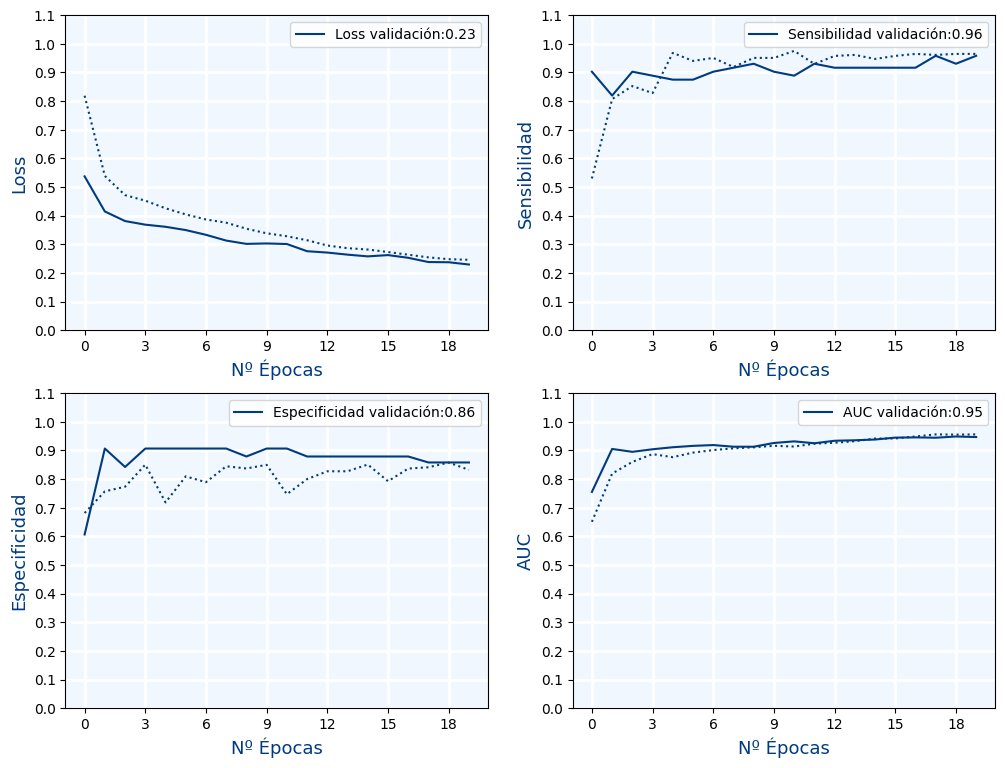

In [9]:
#Ejercicio 3.A
def specificity(y_true, y_score):
    threshold=0.5
    y_pred = tf.cast(tf.greater(y_score, threshold), tf.float32)
 
 
    true_negatives = tf.logical_and(tf.equal(y_true, 0), tf.equal(y_pred, 0))
    num_true_negatives=tf.reduce_sum(tf.cast(true_negatives, tf.float32))
 
 
    negatives =tf.equal(y_true, 0)
    num_negatives= tf.reduce_sum(tf.cast(negatives, tf.float32))
 
 
    specificity = num_true_negatives / (num_negatives + tf.keras.backend.epsilon())
     
    return specificity


x_train, x_test, y_train, y_test=get_datos()

capas=[30,64,32,16,8,1]
activation="ELU"
epochs=20
learning_rate=0.0001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics=["Recall",specificity,"AUC"]

history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_test, y_train, y_test,metrics)


figure=plt.figure(figsize=(12, 9)) 
axes=figure.add_subplot(2,2,1)
plot_metrics(axes,history.history,"","loss","Loss")
axes=figure.add_subplot(2,2,2)
plot_metrics(axes,history.history,"","recall","Sensibilidad")
axes=figure.add_subplot(2,2,3)
plot_metrics(axes,history.history,"","specificity","Especificidad")
axes=figure.add_subplot(2,2,4)
plot_metrics(axes,history.history,"","auc","AUC")

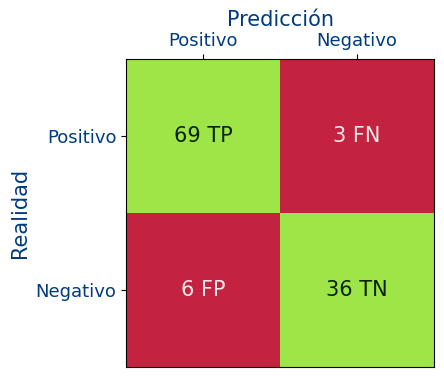

In [10]:
#Ejercicio 3.B

def get_matriz_confusion(y_true,y_score,threshold):

    y_pred=y_score>threshold

    TP=sum((y_true==1) & (y_pred==1))
    TN=sum((y_true==0) & (y_pred==0))
    FP=sum((y_true==0) & (y_pred==1))
    FN=sum((y_true==1) & (y_pred==0))


    return TP,TN,FP,FN

y_score=model.predict(x_test).reshape(-1)
y_true=y_test
TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=0.5)

figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


Sensibilidad=0.00
Especificidad=1.00
VPP=0.00
VPN=0.37
AUC=0.95


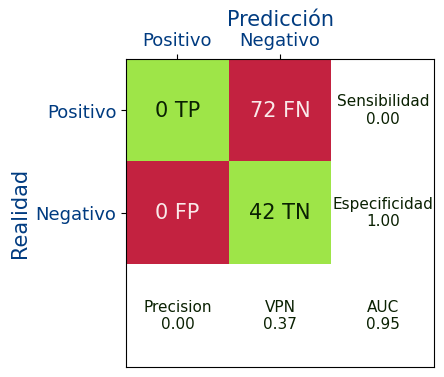

In [64]:
#Ejercicio 3.C

def div_not_nan(a,b):
    if (b==0):
        return 0
    else:
        return a/b
    

def get_metrics(TP,TN,FP,FN,prevalencia=None):
    sensibilidad=div_not_nan(TP,TP+FN)
    especificidad=div_not_nan(TN,TN+FP)
    
    if (prevalencia==None):
        vpp=div_not_nan(TP,TP+FP)
        vpn=div_not_nan(TN,TN+FN)
    else:
        vpp=div_not_nan(sensibilidad*prevalencia,sensibilidad*prevalencia+(1-especificidad)*(1-prevalencia))
        vpn=div_not_nan(especificidad*(1-prevalencia),especificidad*(1-prevalencia)+(1-sensibilidad)*prevalencia)


    auc=sklearn.metrics.roc_auc_score(y_true,y_score)

    return sensibilidad,especificidad,vpp,vpn,auc


sensibilidad,especificidad,vpp,vpn,auc=get_metrics(TP,TN,FP,FN)

print(f"Sensibilidad={sensibilidad:.2f}")
print(f"Especificidad={especificidad:.2f}")
print(f"VPP={vpp:.2f}")
print(f"VPN={vpn:.2f}")
print(f"AUC={auc:.2f}")


figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,sensibilidad=sensibilidad,especificidad=especificidad,vpp=vpp,vpn=vpn,auc=auc)


In [12]:
#Ejercicio 3.D
model.save('mymodel.keras') 

F1-score=0.94


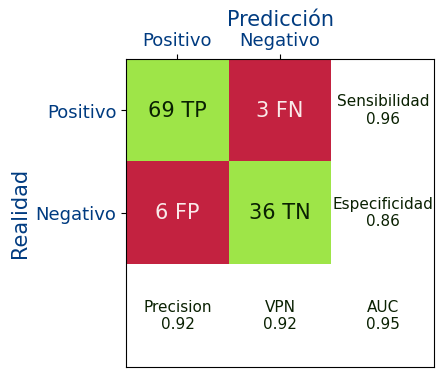

In [45]:
#Ejercicio 3.E
new_model=tf.keras.models.load_model('mymodel.keras',custom_objects={"specificity": specificity})

x_train, x_test, y_train, y_test=get_datos()
y_score=new_model.predict(x_test).reshape(-1)
y_true=y_test

TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=0.5)
sensibilidad,especificidad,vpp,vpn,auc=get_metrics(TP,TN,FP,FN)

figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,sensibilidad=sensibilidad,especificidad=especificidad,vpp=vpp,vpn=vpn,auc=auc)

f1_score=div_not_nan(2*TP,2*TP+FP+FN)
print(f"F1-score={f1_score:.2f}")


El valor del umbra lo bajaría mas o menos a 0.46 ya que tendría el mismo VPP pero mejor el VPN


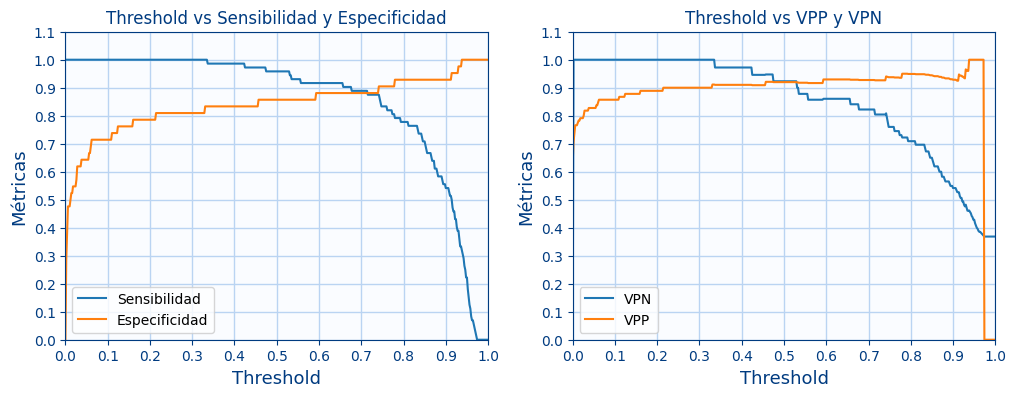

In [48]:
# Ejercicio 3.F
rango_threshold=np.linspace(0,1,500)

rango_sensibilidad=[]
rango_especificidad=[]
rango_vpp=[]
rango_vpn=[]
for threshold in rango_threshold:
    y_score=new_model.predict(x_test).reshape(-1)
    y_true=y_test

    TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=threshold)
    sensibilidad,especificidad,vpp,vpn,auc=get_metrics(TP,TN,FP,FN)
    rango_sensibilidad.append(sensibilidad)
    rango_especificidad.append(especificidad)
    rango_vpp.append(vpp)
    rango_vpn.append(vpn)    


figure=plt.figure(figsize=(12, 4)) 
axes=figure.add_subplot(1,2,1)
axes.plot(rango_threshold,rango_sensibilidad,linestyle="solid",label="Sensibilidad")
axes.plot(rango_threshold,rango_especificidad,linestyle="solid",label="Especificidad")
axes_configure_for_metrics(axes,"Threshold vs Sensibilidad y Especificidad","Threshold","Métricas")

axes=figure.add_subplot(1,2,2)
axes.plot(rango_threshold,rango_vpn,linestyle="solid",label="VPN")
axes.plot(rango_threshold,rango_vpp,linestyle="solid",label="VPP")
axes_configure_for_metrics(axes,"Threshold vs VPP y VPN","Threshold","Métricas")



print("El valor del umbra lo bajaría mas o menos a 0.46 ya que tendría el mismo VPP pero mejor el VPN")


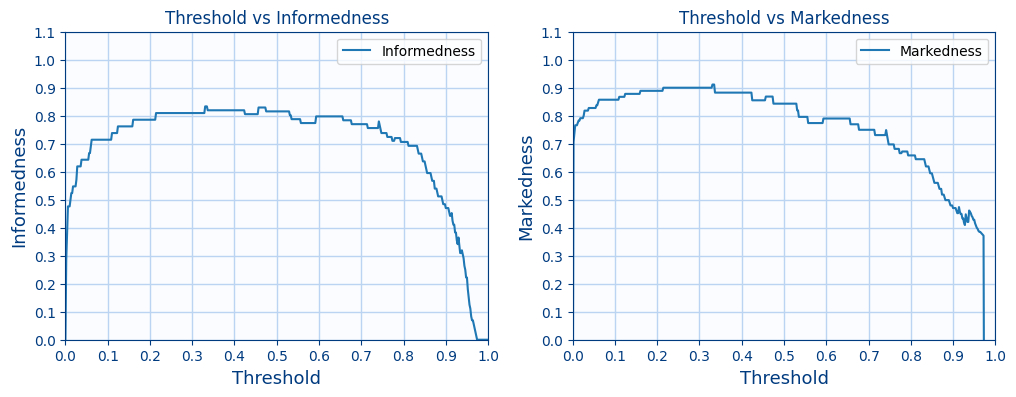

In [96]:
# Ejercicio 3.G
y_score=new_model.predict(x_test).reshape(-1)
y_true=y_test


rango_threshold=np.linspace(0,1,500)
rango_informedness=[]
rango_markedness=[]
for threshold in rango_threshold:

    TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=threshold)
    sensibilidad,especificidad,vpp,vpn,auc=get_metrics(TP,TN,FP,FN)  
    rango_informedness.append(sensibilidad+especificidad-1)
    rango_markedness.append(vpp+vpn-1)



figure=plt.figure(figsize=(12, 4)) 
axes=figure.add_subplot(1,2,1)
axes.plot(rango_threshold,rango_informedness,linestyle="solid",label=f"Informedness")
axes_configure_for_metrics(axes,"Threshold vs Informedness","Threshold","Informedness")

axes=figure.add_subplot(1,2,2)
axes.plot(rango_threshold,rango_markedness,linestyle="solid",label=f"Markedness")
axes_configure_for_metrics(axes,"Threshold vs Markedness","Threshold","Markedness")




In [47]:
# Ejercicio 3.H

print("Una IA que detecta si hay petroleo en el subsuelo", "==>","Aumentar")
print("Una IA que predice si un usuario en Amazon está cometiendo fraude", "==>","Aumentar")
print("Una IA que decide si te concede un préstamo", "==>","Aumentar")
print("Una IA que decide una persona en un juicio es inocente", "==>","Disminuir")


Una IA que detecta si hay petroleo en el subsuelo ==> Aumentar
Una IA que predice si un usuario en Amazon está cometiendo fraude ==> Aumentar
Una IA que decide si te concede un préstamo ==> Aumentar
Una IA que decide si te concede un préstamo ==> Aumentar
